<a href="https://colab.research.google.com/github/BaberFaisal/US-Airport-Network/blob/main/Faisal_Baber_Homework_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chosen Centrality Measures and Rationale**
In this project, we analyze the U.S. air transportation network to identify the most influential airports using centrality measures from network science. Since the problem focuses on understanding the role and impact of different airports in terms of connectivity, traffic flow, and overall reachability within the network, we carefully selected the following centrality measures:

1. Betweenness Centrality

Why chosen:

Betweenness centrality measures how often an airport lies on the shortest path between other airports. In the context of air travel, it identifies airports that act as major transit hubs or bottlenecks, playing a crucial role in routing passengers across the country.

Airports with high betweenness are essential for network connectivity, and their removal could disrupt flow between distant regions.

This is ideal for identifying critical airports whose operations are central to the movement of passengers and goods nationwide.

2. Closeness Centrality

Why chosen:

Closeness centrality reflects how quickly an airport can reach all other airports in the network via the shortest paths. It captures efficiency and accessibility of an airport from a global network perspective.

Airports with high closeness centrality are strategically located, allowing for fast, efficient travel to a wide range of destinations.

This is important for understanding logistical performance and serviceability of airports in emergency, cargo, or high-demand situations.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
!pip install basemap basemap-data-hires matplotlib networkx pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 942.4/942.4 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 70.6 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.1
    Uninstalling pyproj-3.7.1:
      Successfully uninstalled pyproj-3.7.1
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: numpy
    Found existing install

In [2]:
# Load CSV files
airports = pd.read_csv("us_airports.csv")
routes = pd.read_csv("us_routes.csv")

# Preview the data
airports.head()



,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,3411,Barter Island LRRS Airport,Barter Island,United States,BTI,PABA,70.134003,-143.582001,2,-9.0,A,America/Anchorage,airport,OurAirports
1,3412,Wainwright Air Station,Fort Wainwright,United States,NaN,PAWT,70.613403,-159.860001,35,-9.0,A,America/Anchorage,airport,OurAirports
2,3413,Cape Lisburne LRRS Airport,Cape Lisburne,United States,LUR,PALU,68.875099,-166.110001,16,-9.0,A,America/Anchorage,airport,OurAirports
3,3414,Point Lay LRRS Airport,Point Lay,United States,PIZ,PPIZ,69.732903,-163.005005,22,-9.0,A,America/Anchorage,airport,OurAirports
4,3415,Hilo International Airport,Hilo,United States,ITO,PHTO,19.721399,-155.048004,38,-10.0,N,Pacific/Honolulu,airport,OurAirports


In [3]:
routes.head()

,Airline,Airline ID,Source Airport,Source Airport ID,Destination Airport,Destination Airport ID,Codeshare,Stops,Equipment
0,2O,146.0,ADQ,3531.0,KLN,7162.0,NaN,0,BNI
1,2O,146.0,KLN,7162.0,KYK,7161.0,NaN,0,BNI
2,3E,10739.0,BRL,5726.0,ORD,3830.0,NaN,0,CNC
3,3E,10739.0,BRL,5726.0,STL,3678.0,NaN,0,CNC
4,3E,10739.0,DEC,4042.0,ORD,3830.0,NaN,0,CNC


In [4]:
G = nx.DiGraph()

# Add nodes with attributes
for _, row in airports.iterrows():
    G.add_node(row['IATA'], name=row['Name'], city=row['City'],
               lat=row['Latitude'], lon=row['Longitude'])

# Filter routes with valid US airports
valid_iata = set(airports['IATA'])

for _, row in routes.iterrows():
    src = row['Source Airport']
    dst = row['Destination Airport']
    if src in valid_iata and dst in valid_iata:
        G.add_edge(src, dst)


**Centrality Measures**

In [5]:
centralities = {
    'Degree': nx.degree_centrality(G),
    'Betweenness': nx.betweenness_centrality(G),
    'Closeness': nx.closeness_centrality(G),
    'Eigenvector': nx.eigenvector_centrality(G, max_iter=1000),
    'PageRank': nx.pagerank(G)
}


**Identify Top 5 Influential Airports**

In [6]:
top_airports = {}
for measure, values in centralities.items():
    sorted_airports = sorted(values.items(), key=lambda x: x[1], reverse=True)[:5]
    top_airports[measure] = sorted_airports

# Convert to DataFrame for display
top_df = pd.DataFrame({
    measure: [iata for iata, _ in airports]
    for measure, airports in top_airports.items()
})
print("Top 5 Airports by Each Centrality Measure:\n")
top_df


Top 5 Airports by Each Centrality Measure:



,Degree,Betweenness,Closeness,Eigenvector,PageRank
0,ATL,ANC,DEN,ATL,DEN
1,DEN,DEN,ORD,ORD,ATL
2,ORD,ORD,LAS,DFW,ORD
3,DFW,SEA,MSP,DEN,DFW
4,MSP,ATL,SEA,DTW,MSP


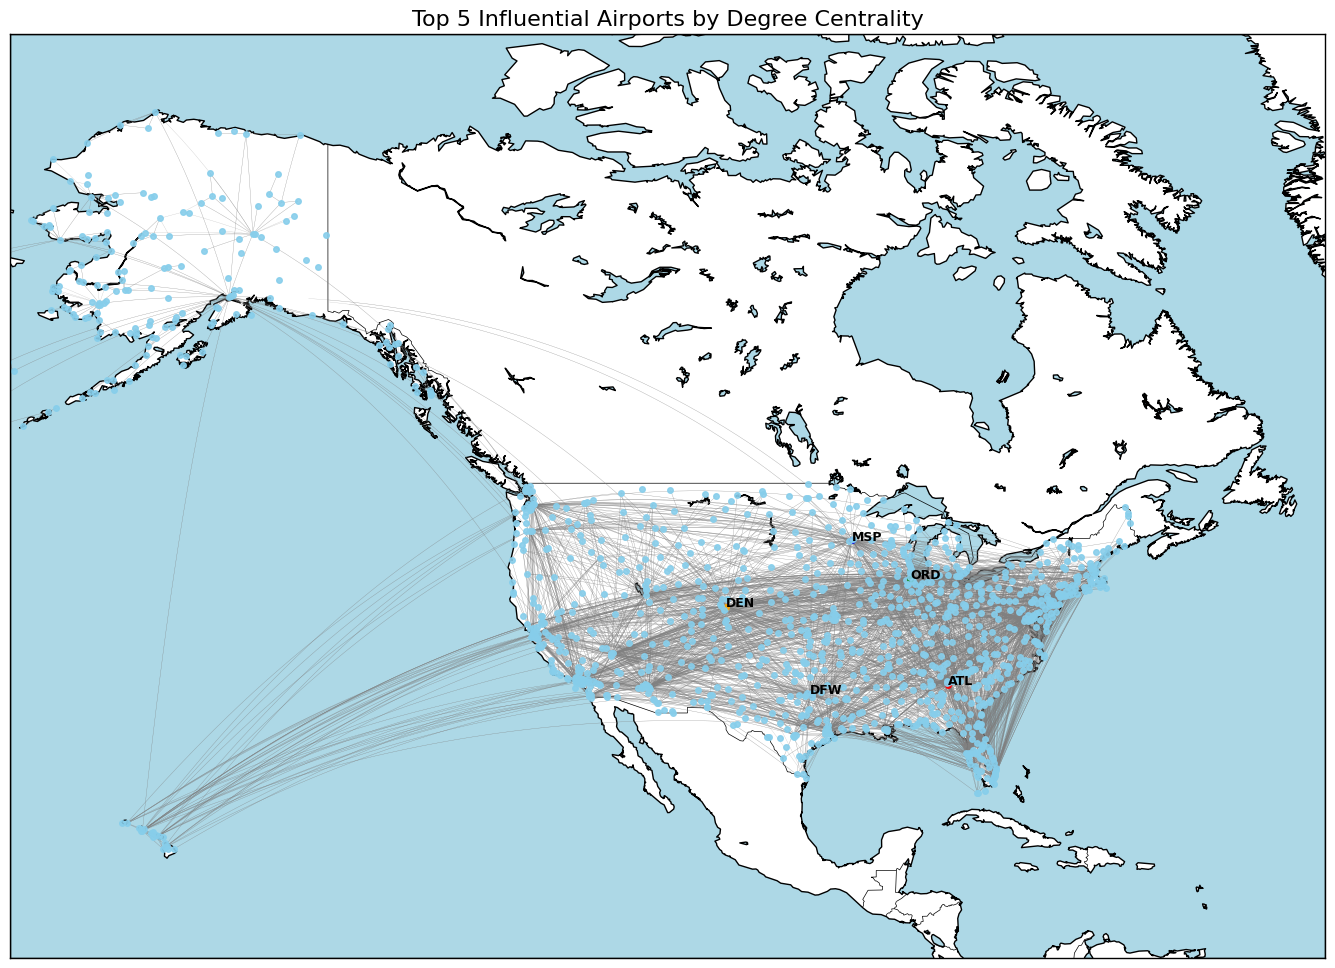

In [10]:
# Keep US airports with valid IATA
airports = airports[(airports['Country'] == 'United States') & (airports['IATA'].notnull())]
iata_set = set(airports['IATA'])

# Build graph
G = nx.DiGraph()
for _, row in airports.iterrows():
    G.add_node(row['IATA'], lat=row['Latitude'], lon=row['Longitude'], name=row['Name'])

for _, row in routes.iterrows():
    src = row['Source Airport']
    dst = row['Destination Airport']
    if src in iata_set and dst in iata_set:
        G.add_edge(src, dst)

# Centrality measures
centralities = {
    'Degree': nx.degree_centrality(G),
    'Betweenness': nx.betweenness_centrality(G),
    'Closeness': nx.closeness_centrality(G),
    'Eigenvector': nx.eigenvector_centrality(G, max_iter=1000),
    'PageRank': nx.pagerank(G)
}

# Get top airports (using Degree for color highlight)
top_degree = sorted(centralities['Degree'].items(), key=lambda x: x[1], reverse=True)[:5]
top_nodes = [x[0] for x in top_degree]

# Color mapping
node_color_map = []
for node in G.nodes:
    if node == top_nodes[0]:
        node_color_map.append('red')
    elif node == top_nodes[1]:
        node_color_map.append('orange')
    elif node == top_nodes[2]:
        node_color_map.append('green')
    elif node == top_nodes[3]:
        node_color_map.append('purple')
    elif node == top_nodes[4]:
        node_color_map.append('blue')
    else:
        node_color_map.append('skyblue')

# Plot with Basemap
plt.figure(figsize=(20, 12))
m = Basemap(projection='mill', llcrnrlat=10, urcrnrlat=75, llcrnrlon=-170, urcrnrlon=-50, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='white', lake_color='lightblue')

# Plot all routes
for u, v in G.edges():
    try:
        lon1, lat1 = G.nodes[u]['lon'], G.nodes[u]['lat']
        lon2, lat2 = G.nodes[v]['lon'], G.nodes[v]['lat']
        x1, y1 = m(lon1, lat1)
        x2, y2 = m(lon2, lat2)
        m.drawgreatcircle(lon1, lat1, lon2, lat2, linewidth=0.2, color='gray', alpha=0.5)
    except:
        continue

# Plot airports
for i, node in enumerate(G.nodes):
    lon, lat = G.nodes[node]['lon'], G.nodes[node]['lat']
    x, y = m(lon, lat)
    m.plot(x, y, marker='o', markersize=4, color=node_color_map[i], alpha=0.9)
    if node in top_nodes:
        plt.text(x, y, node, fontsize=9, fontweight='bold', color='black')

plt.title("Top 5 Influential Airports by Degree Centrality", fontsize=16)
plt.show()


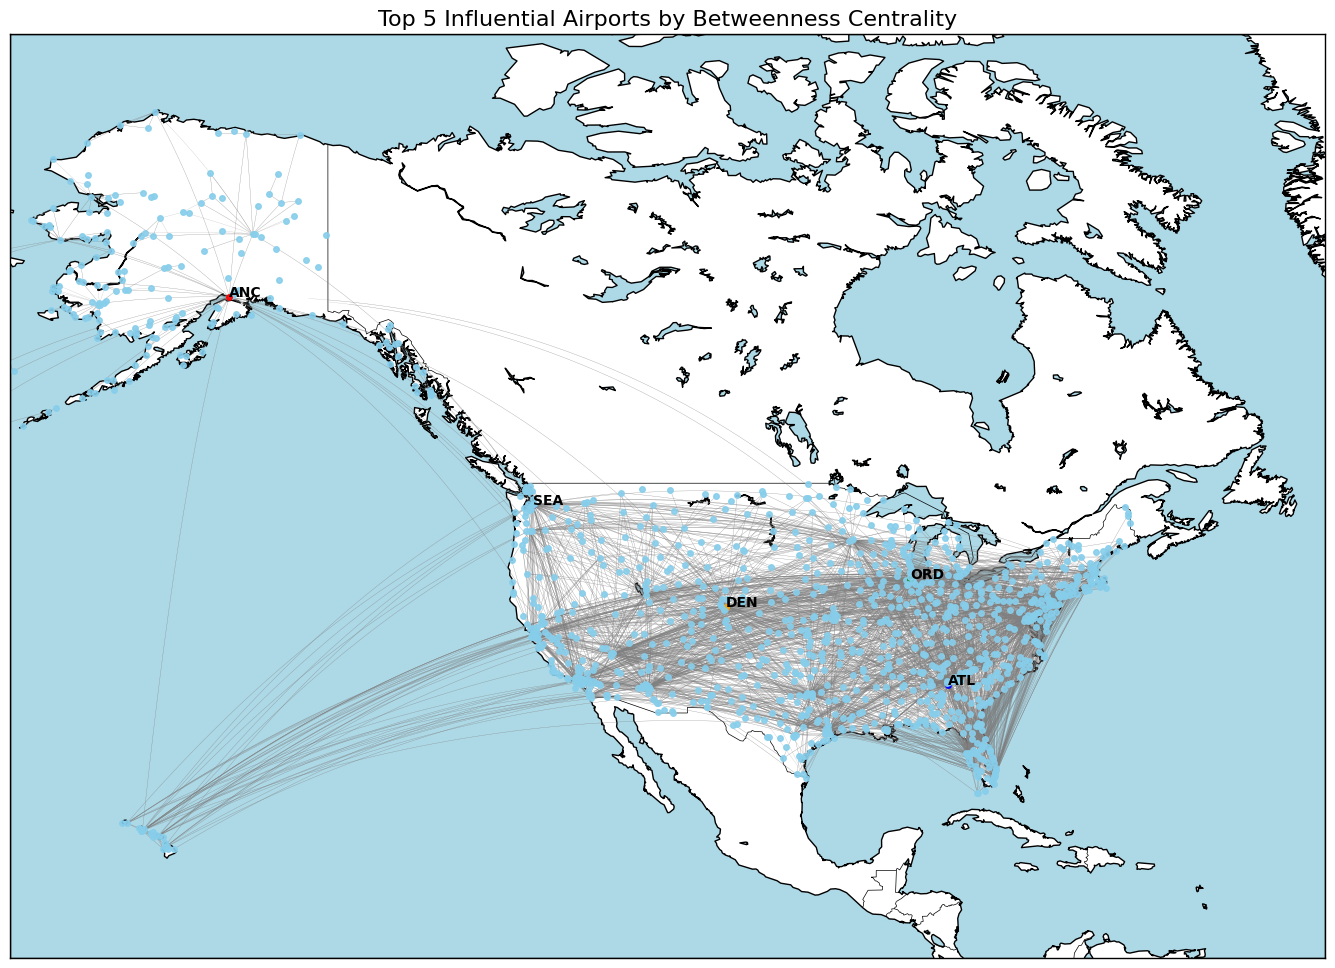

In [8]:
# Keep only US airports with valid IATA
airports = airports[(airports['Country'] == 'United States') & (airports['IATA'].notnull())]
iata_set = set(airports['IATA'])

# Build directed graph
G = nx.DiGraph()
for _, row in airports.iterrows():
    G.add_node(row['IATA'], lat=row['Latitude'], lon=row['Longitude'], name=row['Name'])

for _, row in routes.iterrows():
    src = row['Source Airport']
    dst = row['Destination Airport']
    if src in iata_set and dst in iata_set:
        G.add_edge(src, dst)

# Calculate Betweenness Centrality
betweenness = nx.betweenness_centrality(G)
top_5_btwn = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
top_nodes = [x[0] for x in top_5_btwn]

# Color map based on Betweenness
node_color_map = []
for node in G.nodes:
    if node == top_nodes[0]:
        node_color_map.append('red')
    elif node == top_nodes[1]:
        node_color_map.append('orange')
    elif node == top_nodes[2]:
        node_color_map.append('green')
    elif node == top_nodes[3]:
        node_color_map.append('purple')
    elif node == top_nodes[4]:
        node_color_map.append('blue')
    else:
        node_color_map.append('skyblue')

# Basemap visualization
plt.figure(figsize=(20, 12))
m = Basemap(projection='mill', llcrnrlat=10, urcrnrlat=75, llcrnrlon=-170, urcrnrlon=-50, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='white', lake_color='lightblue')

# Draw routes
for u, v in G.edges():
    try:
        lon1, lat1 = G.nodes[u]['lon'], G.nodes[u]['lat']
        lon2, lat2 = G.nodes[v]['lon'], G.nodes[v]['lat']
        m.drawgreatcircle(lon1, lat1, lon2, lat2, linewidth=0.2, color='gray', alpha=0.5)
    except:
        continue

# Draw nodes
for i, node in enumerate(G.nodes):
    x, y = m(G.nodes[node]['lon'], G.nodes[node]['lat'])
    m.plot(x, y, marker='o', markersize=4, color=node_color_map[i], alpha=0.9)
    if node in top_nodes:
        plt.text(x, y, node, fontsize=10, fontweight='bold', color='black')

plt.title("Top 5 Influential Airports by Betweenness Centrality", fontsize=16)
plt.show()


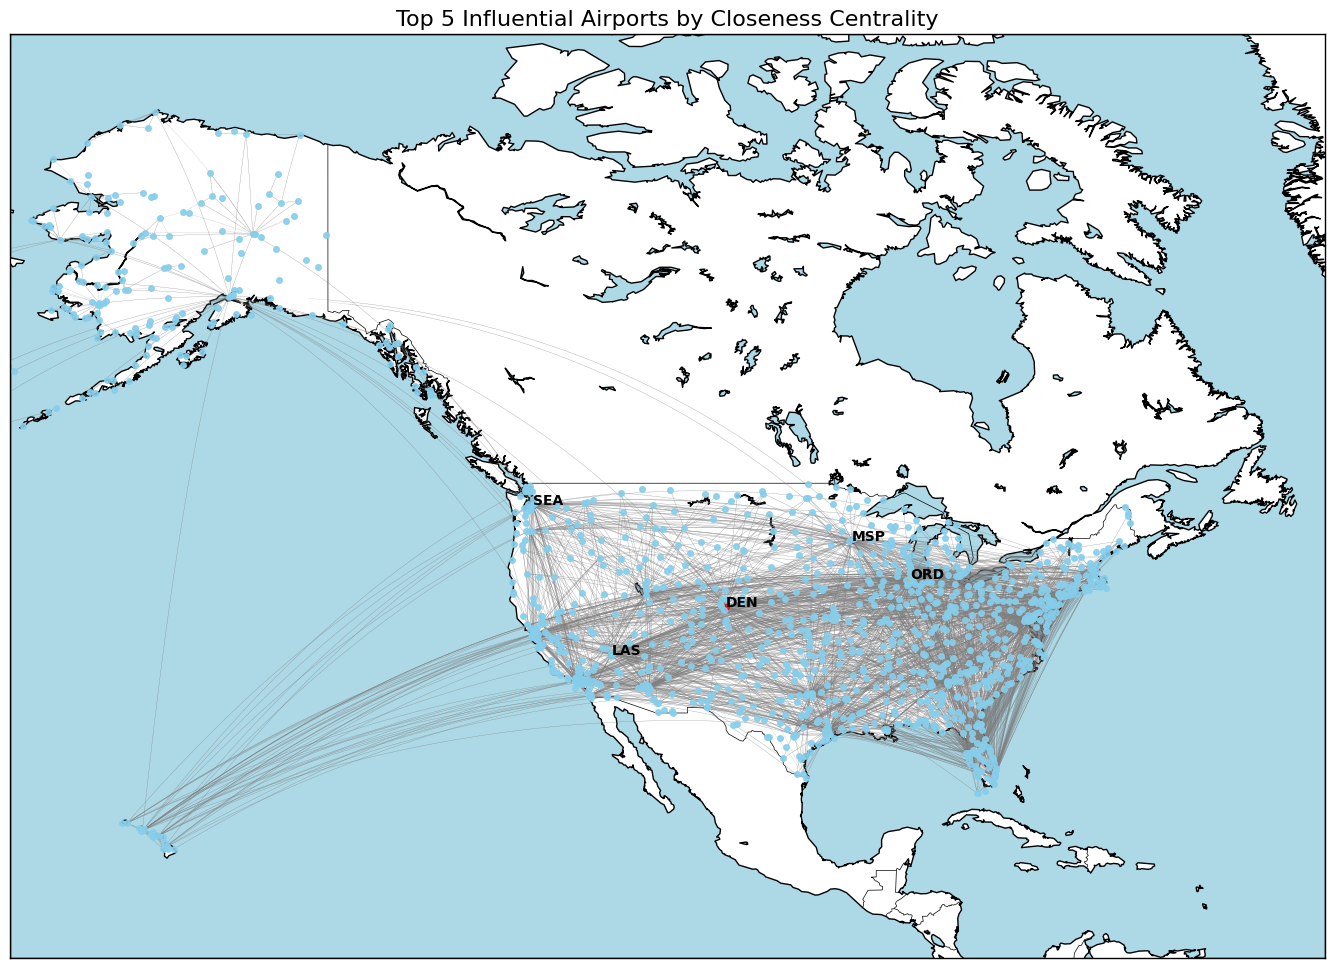

In [11]:
# Calculate Closeness Centrality (in a strongly connected component only)
largest_cc = max(nx.strongly_connected_components(G), key=len)
G_sub = G.subgraph(largest_cc).copy()
closeness = nx.closeness_centrality(G_sub)

# Get top 5 by Closeness
top_5_close = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5]
top_nodes_close = [x[0] for x in top_5_close]

# Color map for Closeness
node_color_map_close = []
for node in G.nodes:
    if node == top_nodes_close[0]:
        node_color_map_close.append('red')
    elif node == top_nodes_close[1]:
        node_color_map_close.append('orange')
    elif node == top_nodes_close[2]:
        node_color_map_close.append('green')
    elif node == top_nodes_close[3]:
        node_color_map_close.append('purple')
    elif node == top_nodes_close[4]:
        node_color_map_close.append('blue')
    else:
        node_color_map_close.append('skyblue')

# Draw map with Closeness Centrality highlights
plt.figure(figsize=(20, 12))
m = Basemap(projection='mill', llcrnrlat=10, urcrnrlat=75, llcrnrlon=-170, urcrnrlon=-50, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='white', lake_color='lightblue')

# Routes
for u, v in G.edges():
    try:
        lon1, lat1 = G.nodes[u]['lon'], G.nodes[u]['lat']
        lon2, lat2 = G.nodes[v]['lon'], G.nodes[v]['lat']
        m.drawgreatcircle(lon1, lat1, lon2, lat2, linewidth=0.2, color='gray', alpha=0.5)
    except:
        continue

# Nodes
for i, node in enumerate(G.nodes):
    x, y = m(G.nodes[node]['lon'], G.nodes[node]['lat'])
    m.plot(x, y, marker='o', markersize=4, color=node_color_map_close[i], alpha=0.9)
    if node in top_nodes_close:
        plt.text(x, y, node, fontsize=10, fontweight='bold', color='black')

plt.title("Top 5 Influential Airports by Closeness Centrality", fontsize=16)
plt.show()
